<a href="https://colab.research.google.com/github/HinaSagheer/Machine-learning-on-housing-data/blob/main/Machine_learning_Models_on_housing_data(_Hina_%26_Kiran).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# linear regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

print(df.head())
print(df.info())
print(df.describe())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

In [28]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Outlier removal example (on median_income only, can do for more columns)
Q1 = np.percentile(df['median_income'], 25)
Q3 = np.percentile(df['median_income'], 75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['median_income'] >= lower) & (df['median_income'] <= upper)]


Missing values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


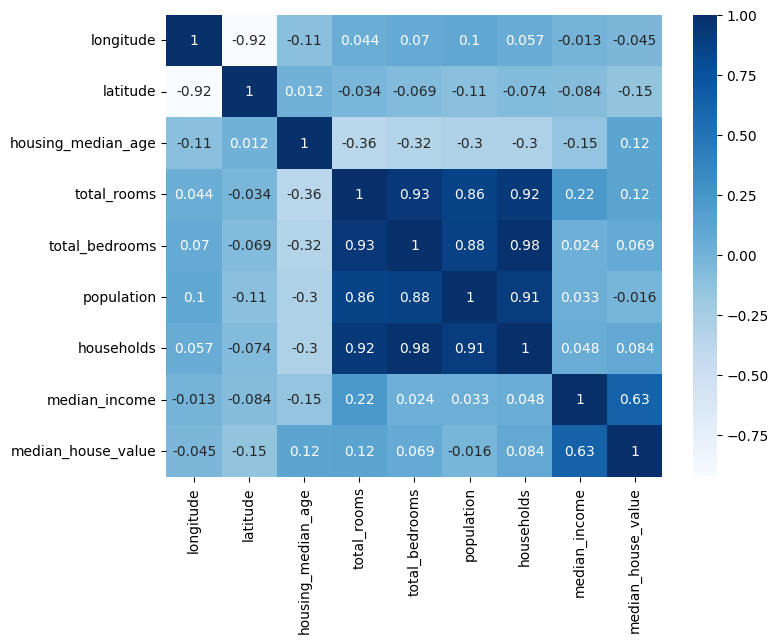

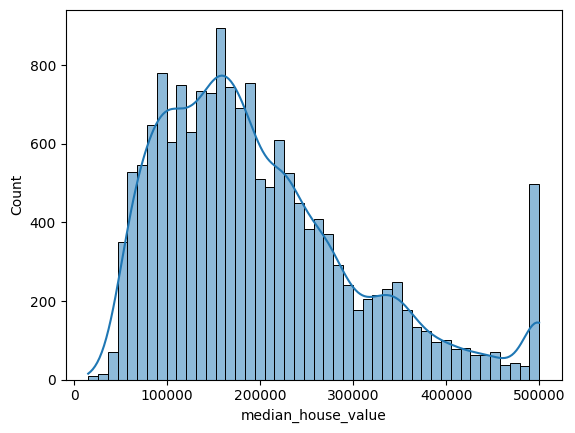

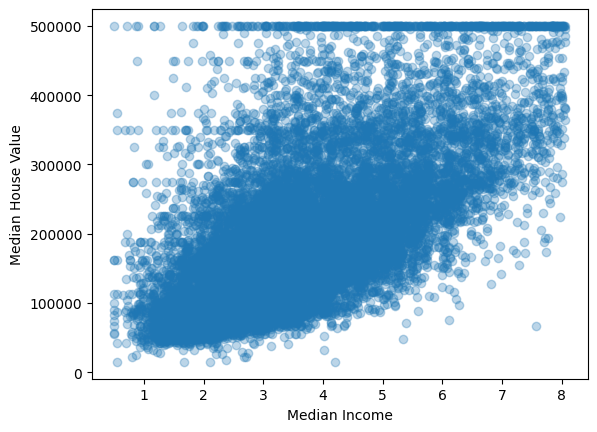

In [29]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

# Distribution of target
sns.histplot(df['median_house_value'], kde=True)
plt.show()

# Scatterplot: Income vs House Value
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


In [30]:
# Define features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# R² and error metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


R² Score: 0.6153826829346556
MSE: 4289400225.4016156
RMSE: 65493.51284975952


In [31]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


              Feature   Coefficient
0           longitude -40529.053622
1            latitude -39981.578730
2  housing_median_age   1247.488895
3         total_rooms    -14.503197
4      total_bedrooms    145.170588
5          population    -34.651759
6          households     35.901458
7       median_income  45071.200972


In [33]:
from sklearn.linear_model import Ridge


In [34]:
# Train Ridge model
ridge_model = Ridge(alpha=1.0)   # alpha = regularization strength
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge Regression Results")
print("R² Score:", r2_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)


Ridge Regression Results
R² Score: 0.6153825634875554
MSE: 4289401557.5216117
RMSE: 65493.523019620894


In [35]:
from sklearn.linear_model import Lasso


In [36]:
# Train Lasso model
lasso_model = Lasso(alpha=0.1)   # alpha controls regularization
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Regression Results")
print("R² Score:", r2_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)


Lasso Regression Results
R² Score: 0.6153826773278113
MSE: 4289400287.9312997
RMSE: 65493.513327132634


In [39]:
from sklearn.ensemble import RandomForestRegressor


In [40]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Regression Results")
print("R² Score:", r2_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)


Random Forest Regression Results
R² Score: 0.7907280838504969
MSE: 2333880884.9040995
RMSE: 48310.25651871556
